# Metadata

```yaml
course:   DS 5001 
topic:    PCA
author:   Andrew Chaphiv (acgq2@virginia.edu)
date:    SPR2023
```


# Hyperparameters 

In [78]:
sns.set(style='ticks')
OHCO = ['abstract_num', 'sent_num', 'token_num']
norm_docs = True # This has the effect of exaggerating variance when False
center_term_vectors = True # This has the effect of demoting authorship when False

# Importing Modules and Data Files

In [77]:
import pandas as pd
import numpy as np
from scipy.linalg import norm, eigh
import plotly_express as px
import seaborn as sns
import string

In [79]:
LIB = pd.read_csv("abstracts-LIB.csv", index_col = 0)
CORPUS = pd.read_csv("abstracts-CORPUS.csv").set_index(OHCO)
VOCAB = pd.read_csv("abstracts-VOCAB.csv", index_col = 0)

In [80]:
one_words = CORPUS.term_str.value_counts()
one_words = one_words[one_words == 1].index
CORPUS = CORPUS[~CORPUS.term_str.isin(one_words)] # Drop everything that occurs only once, likely not a word

# Creating BOW and TFIDF

In [81]:
def bag_words(df, bag = ['abstract_num']):
    bow = df.groupby(bag+['term_str']).term_str.count().to_frame('n')
    return bow

In [82]:
bow = bag_words(CORPUS)


In [83]:
bow = bow[bow['n'] != 1] # In order to get the bow tf and tfidf to be stacked onto the bow, I had to reduce the bow immensely, so I only chose words that occured more than once. 

In [84]:
DTCM = bow.n.unstack().fillna(0).astype('int')
TF = DTCM.T / DTCM.T.max()
TF = TF.T

In [85]:
N = DTCM.shape[0]
DF = DTCM.astype('bool').sum()
IDF = np.log2(N / DF)
TFIDF = TF * IDF

In [86]:
bow['tf'] = TF.stack()
bow['tfidf'] = TFIDF.stack()
bow.to_csv("abstracts-BOW.csv")

In [87]:
VSHORT = VOCAB[VOCAB.max_pos.isin(['NN', 'NNS'])].sort_values('dfidf', ascending=False).head(1000) 
VSHORT = list(set(VSHORT.index).intersection(TFIDF.columns)) # Because I filtered the BOW, some of the terms were not present in the TFIDF.
TFIDF = TFIDF[VSHORT]

In [88]:
TFIDF

term_str      training  survivin  tissues.  tumors,   cm  glycerol  mass  \
abstract_num                                                               
0                  0.0       0.0       0.0      0.0  0.0       0.0   0.0   
1                  0.0       0.0       0.0      0.0  0.0       0.0   0.0   
2                  0.0       0.0       0.0      0.0  0.0       0.0   0.0   
3                  0.0       0.0       0.0      0.0  0.0       0.0   0.0   
4                  0.0       0.0       0.0      0.0  0.0       0.0   0.0   
...                ...       ...       ...      ...  ...       ...   ...   
9793               0.0       0.0       0.0      0.0  0.0       0.0   0.0   
9794               0.0       0.0       0.0      0.0  0.0       0.0   0.0   
9795               0.0       0.0       0.0      0.0  0.0       0.0   0.0   
9796               0.0       0.0       0.0      0.0  0.0       0.0   0.0   
9797               0.0       0.0       0.0      0.0  0.0       0.0   0.0   

term_str      gain  subset  survival,  ...  yields  lesions  infusion  \
abstract_num                           ...                              
0              0.0     0.0        0.0  ...     0.0      0.0       0.0   
1              0.0     0.0        0.0  ...     0.0      0.0       0.0   
2              0.0     0.0        0.0  ...     0.0      0.0       0.0   
3              0.0     0.0        0.0  ...     0.0      0.0       0.0   
4              0.0     0.0        0.0  ...     0.0      0.0       0.0   
...            ...     ...        ...  ...     ...      ...       ...   
9793           0.0     0.0        0.0  ...     0.0      0.0       0.0   
9794           0.0     0.0        0.0  ...     0.0      0.0       0.0   
9795           0.0     0.0        0.0  ...     0.0      0.0       0.0   
9796           0.0     0.0        0.0  ...     0.0      0.0       0.0   
9797           0.0     0.0        0.0  ...     0.0      0.0       0.0   

term_str      hypoxia  regression  vivo.  sensitivity  indications      data  \
abstract_num                                                                   
0                 0.0         0.0    0.0          0.0          0.0  0.000000   
1                 0.0         0.0    0.0          0.0          0.0  0.533204   
2                 0.0         0.0    0.0          0.0          0.0  0.000000   
3                 0.0         0.0    0.0          0.0          0.0  0.000000   
4                 0.0         0.0    0.0          0.0          0.0  0.000000   
...               ...         ...    ...          ...          ...       ...   
9793              0.0         0.0    0.0          0.0          0.0  0.000000   
9794              0.0         0.0    0.0          0.0          0.0  0.000000   
9795              0.0         0.0    0.0          0.0          0.0  0.000000   
9796              0.0         0.0    0.0          0.0          0.0  0.000000   
9797              0.0         0.0    0.0          0.0          0.0  0.000000   

term_str      cytotoxic  
abstract_num             
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
9793                0.0  
9794                0.0  
9795                0.0  
9796                0.0  
9797                0.0  

[9798 rows x 991 columns]

In [89]:
DOCS = bow.groupby(['abstract_num']).n.sum().to_frame('n')
DOCS = DOCS.join(LIB, on='abstract_num')
DOCS

n                                              Title  \
abstract_num                                                           
0              57  Stimulation of the sphingomyelin pathway induc...   
1             107  Non-parametric estimation of the post-lead-tim...   
2              44  Non-parametric methods for analysing recurrent...   
3              89  Effect of serum albumin on estrogen metabolism...   
4              47  Effect of a new de-N-acetyl-lysoglycosphingoli...   
...           ...                                                ...   
9793          119  Unmet Needs and Receipt of Supportive Care Ser...   
9794          109  The Intersection of Race and Rurality and its ...   
9795           94  Upregulation of Coagulation Factor VIII and Fi...   
9796          140  A Study of 57 Patients with Prostate Cancer to...   
9797          126  Separation Surgery and Postoperative Intensity...   

                                                        Authors  \
abstract_num                                                      
0                     Fiebich BL(1), Lieb K, Berger M, Bauer J.   
1                                          Xu JL(1), Prorok PC.   
2                          Lancar R(1), Kramar A, Haie-Meder C.   
3              Bradlow HL(1), Arcuri F, Blasi L, Castagnetta L.   
4             Tubaro E(1), Borelli GP, Belogi L, Cavallo G, ...   
...                                                         ...   
9793          Day AT(1), Prestwood CA(1), Emmett TR(1), Eary...   
9794          Tobin EC(1), Nolan N(2), Thompson S(1), Elmore...   
9795          Myllylahti L(1), Ropponen J(2), Lax M(3), Lass...   
9796          Hwang BY(1)(2), Lee D(1)(2), Kwon JY(2), Kim O...   
9797          Kanda Y(1), Yurube T(1), Kuroda R(1), Kakutani...   

                                                       Abstract  Year  \
abstract_num                                                            
0             Interleukin-6 (IL-6) has previously been shown...  1995   
1             The goal of screening programmes for cancer is...  1995   
2             Non-parametric methods have recently been prop...  1995   
3             The observation that charcoal-treated fetal bo...  1995   
4             A new de-N-acetylated glycosphingolipid termed...  1995   
...                                                         ...   ...   
9793          OBJECTIVE: To characterize the supportive care...  2023   
9794          INTRODUCTION: Outcomes in colorectal cancer tr...  2023   
9795          OBJECTIVES: Chronic thromboembolic pulmonary h...  2023   
9796          BACKGROUND Robot-assisted radical prostatectom...  2023   
9797          BACKGROUND Myxofibrosarcoma involving the spin...  2023   

              Abstract Length  
abstract_num                   
0                         843  
1                        1186  
2                         706  
3                        1251  
4                         970  
...                       ...  
9793                     1634  
9794                     1839  
9795                     1318  
9796                     1676  
9797                     1918  

[9798 rows x 6 columns]

In [90]:
LIB_COLS = ['Authors','Title', 'Year']

In [61]:
def PCA(X, k, norm_docs = True, center_by_mean = False, center_by_variance = False): # PCA funciton that generates the resulting dataframes 
    if norm_docs == True: 
        X = (X.T / norm(X, 2)).T
        
    if center_by_mean == True:
        X = X - X.mean()
        
    if center_by_variance == True:
        X = X - X.var()
        
    COV = X.cov()
    eig_vals, eig_vecs = eigh(COV)
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
    EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)
    EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)
    COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(k).reset_index(drop=True)
    COMPS.index.name = 'comp_id'
    COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
    COMPS.index.name = 'pc_id'
    LOADINGS = COMPS[COV.index].T
    LOADINGS.index.name = 'term_str'
    DCM = X.dot(COMPS[COV.index].T) 
    DCM = DCM.join(LIB[LIB_COLS], on='abstract_num')

    return LOADINGS, DCM, COMPS

In [62]:
LOADINGS, DCM, COMPS = PCA(TFIDF, 10)

In [92]:
COMPS.to_csv("abstracts-COMPS.csv")
LOADINGS.to_csv("abstracts-LOADINGS.csv")
DCM.to_csv("abstracts-DCM.csv")

# Visualizing PCs and Loadings 

In [64]:
def vis_pcs(M, a, b, label='Year', hover_name = 'Title', symbol=None, size=None):
    fig = px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name = hover_name,
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)
    fig.show()

def vis_loadings(LOADINGS, a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VOCAB)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos', 
                      marginal_x='box', height=800)

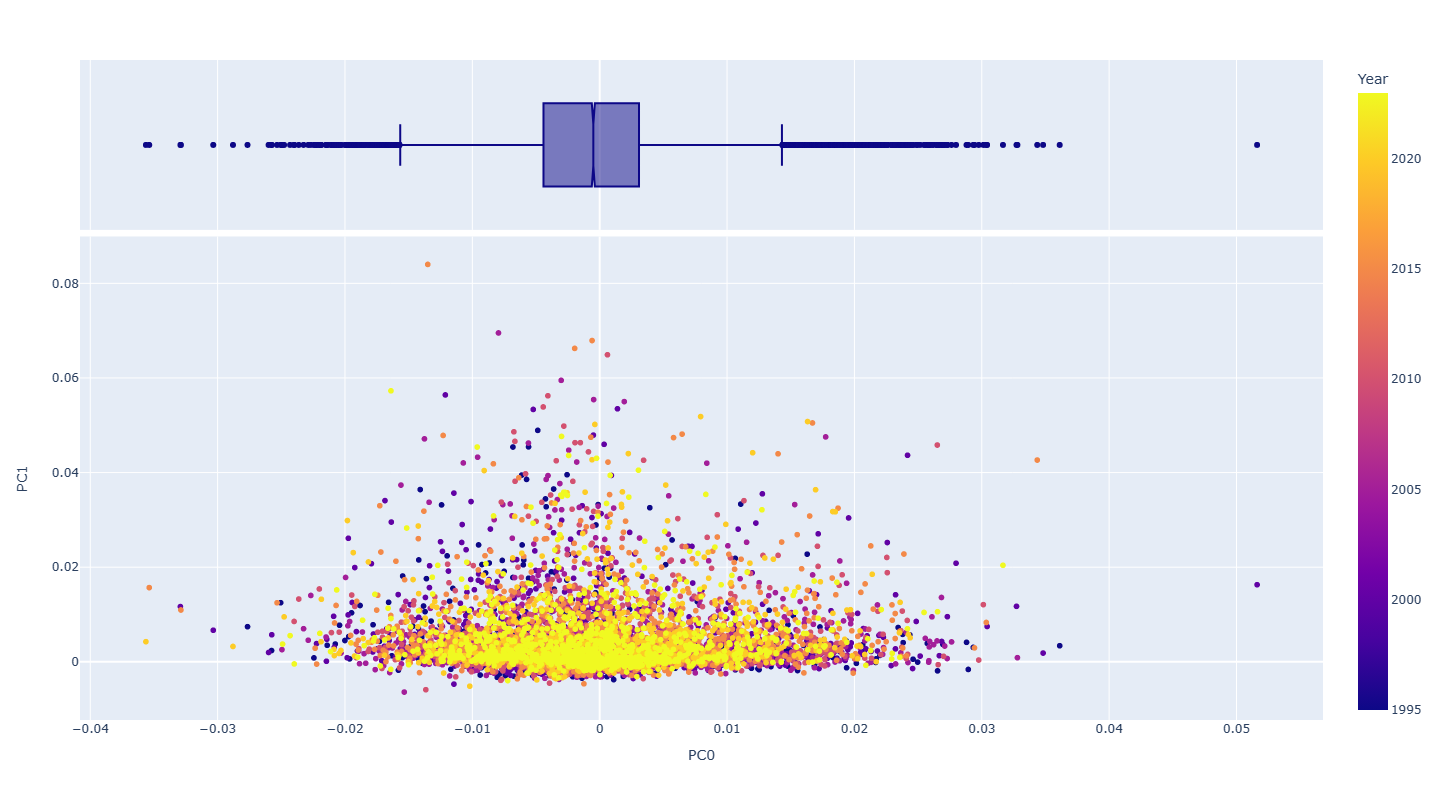

In [76]:
vis_pcs(DCM, 0, 1)

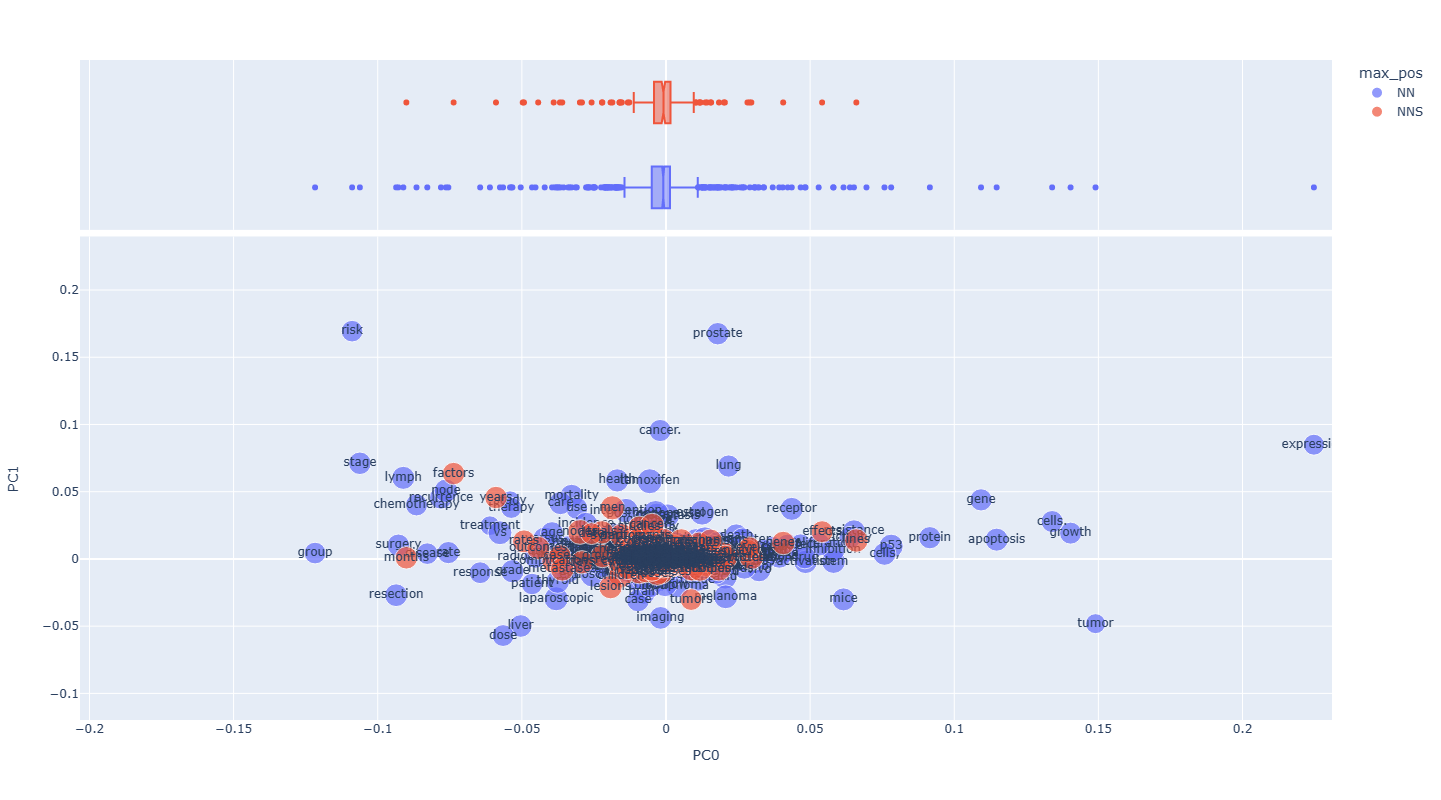

In [68]:
vis_loadings(LOADINGS, 0, 1)